# RNN Model with 1 to 6 Layers - with Dropout (0.3) & ES

In [1]:
import pandas as pd
import rnn_loop
from processing import preprocessing
from keras.models import load_model

In [2]:
# earlyStopping patience = 50 
# models = 6 
# epochs = 500
# dropout = 0.3

In [3]:
load_processed_df_from_disk = True

if load_processed_df_from_disk:
    # load processed spectoragramms
    data_df = pd.read_json('/datasets/UrbanSound8K/processed/mean_mfcc_data.json')

else:
    # preprocess the raw dataset
    data_df = preprocessing.load_dataset()
    data_df['feature'] = data_df['feature'].apply(preprocessing.calculate_mean_mfcc, preprocessing.DEFAULT_SAMPLE_RATE)

data_df = preprocessing.filter_mfccs(data_df)

X_train, X_test, y_train, y_test = preprocessing.create_training_data_RNN(data_df)

/home/bilgecan_cihan/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
num_outputs = data_df['label'].unique().shape[0]  # labels = 10

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("num_outputs: ", num_outputs)

X_train shape: (5861, 173, 40)
X_test shape: (1466, 173, 40)
y_train shape: (5861, 10)
y_test shape: (1466, 10)
num_outputs:  10


In [5]:
model = rnn_loop.RNN_loop(num_outputs, num_models=6, DP_rate=0.3)

In [6]:
model.build_RNN_model()

{'model_1': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19b89d5748>,
 'model_2': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19b89ce3c8>,
 'model_3': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19d34e4be0>,
 'model_4': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19d0f11a20>,
 'model_5': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19e86e77b8>,
 'model_6': <tensorflow.python.keras.engine.sequential.Sequential at 0x7f19bc3b1d68>}

In [7]:
model.initialize(X_test, y_test)

 SUMMARY FOR MODEL  1
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
46/46 [==============================] - 0s 7ms/step - loss: 2.5131 - accuracy: 0.0737
Pre-train

46/46 [==============================] - 0s 8ms/step - loss: 2.3015 - accuracy: 0.1262
Pre-training accuracy: 12.6194%

 SUMMARY FOR MODEL  6
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 128)               86528     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)    

In [8]:
histories, durations = model.train(X_train, X_test, y_train, y_test, num_epochs=500, batch_size=256)

Training for model  1  has started.
Epoch 1/500
22/23 [===========================>..] - ETA: 0s - loss: 2.3148 - accuracy: 0.1341
Epoch 00001: val_loss improved from inf to 2.17717, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 2.3100 - accuracy: 0.1355 - val_loss: 2.1772 - val_accuracy: 0.2026
Epoch 2/500
22/23 [===========================>..] - ETA: 0s - loss: 2.1267 - accuracy: 0.2143
Epoch 00002: val_loss improved from 2.17717 to 2.01496, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 2.1238 - accuracy: 0.2155 - val_loss: 2.0150 - val_accuracy: 0.2865
Epoch 3/500
22/23 [===========================>..] - ETA: 0s - loss: 2.0169 - accuracy: 0.2575
Epoch 00003: val_loss improved from 2.01496 to 1.89514, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 2.0135 - accu

Epoch 25/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8162 - accuracy: 0.7189
Epoch 00025: val_loss improved from 0.73643 to 0.72349, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.8206 - accuracy: 0.7185 - val_loss: 0.7235 - val_accuracy: 0.7633
Epoch 26/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7642 - accuracy: 0.7353
Epoch 00026: val_loss improved from 0.72349 to 0.71257, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.7670 - accuracy: 0.7340 - val_loss: 0.7126 - val_accuracy: 0.7756
Epoch 27/500
20/23 [=========================>....] - ETA: 0s - loss: 0.7723 - accuracy: 0.7309
Epoch 00027: val_loss improved from 0.71257 to 0.66403, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 0s 21ms/step - loss: 0.7752 - accuracy: 0.7297 - val_loss: 0.66

Epoch 51/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4041 - accuracy: 0.8622
Epoch 00051: val_loss did not improve from 0.50314
23/23 [==============================] - 1s 24ms/step - loss: 0.4019 - accuracy: 0.8632 - val_loss: 0.5135 - val_accuracy: 0.8281
Epoch 52/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3935 - accuracy: 0.8686
Epoch 00052: val_loss did not improve from 0.50314
23/23 [==============================] - 1s 24ms/step - loss: 0.3929 - accuracy: 0.8686 - val_loss: 0.5129 - val_accuracy: 0.8383
Epoch 53/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3939 - accuracy: 0.8606
Epoch 00053: val_loss improved from 0.50314 to 0.49739, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.3905 - accuracy: 0.8616 - val_loss: 0.4974 - val_accuracy: 0.8424
Epoch 54/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3732 - accuracy: 0.8722
Epoch 00

Epoch 79/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2544 - accuracy: 0.9130
Epoch 00079: val_loss did not improve from 0.45323
23/23 [==============================] - 1s 23ms/step - loss: 0.2533 - accuracy: 0.9135 - val_loss: 0.4861 - val_accuracy: 0.8561
Epoch 80/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2456 - accuracy: 0.9154
Epoch 00080: val_loss improved from 0.45323 to 0.45189, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.2445 - accuracy: 0.9164 - val_loss: 0.4519 - val_accuracy: 0.8690
Epoch 81/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2820 - accuracy: 0.9006
Epoch 00081: val_loss improved from 0.45189 to 0.45099, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.2806 - accuracy: 0.9010 - val_loss: 0.4510 - val_accuracy: 0.8724
Epoch 82/500
22/23 [===================

22/23 [===========================>..] - ETA: 0s - loss: 0.2515 - accuracy: 0.9178
Epoch 00108: val_loss did not improve from 0.45099
23/23 [==============================] - 1s 23ms/step - loss: 0.2491 - accuracy: 0.9184 - val_loss: 0.5061 - val_accuracy: 0.8663
Epoch 109/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2155 - accuracy: 0.9252
Epoch 00109: val_loss did not improve from 0.45099
23/23 [==============================] - 0s 20ms/step - loss: 0.2190 - accuracy: 0.9236 - val_loss: 0.4939 - val_accuracy: 0.8718
Epoch 110/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2041 - accuracy: 0.9312
Epoch 00110: val_loss did not improve from 0.45099
23/23 [==============================] - 0s 20ms/step - loss: 0.2034 - accuracy: 0.9319 - val_loss: 0.5388 - val_accuracy: 0.8704
Epoch 111/500
20/23 [=========================>....] - ETA: 0s - loss: 0.2103 - accuracy: 0.9268
Epoch 00111: val_loss did not improve from 0.45099
23/23 [=========================

22/23 [===========================>..] - ETA: 0s - loss: 0.1722 - accuracy: 0.9425
Epoch 00137: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 24ms/step - loss: 0.1716 - accuracy: 0.9427 - val_loss: 0.5837 - val_accuracy: 0.8677
Epoch 138/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1543 - accuracy: 0.9505
Epoch 00138: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 24ms/step - loss: 0.1534 - accuracy: 0.9507 - val_loss: 0.5828 - val_accuracy: 0.8697
Epoch 139/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1669 - accuracy: 0.9416
Epoch 00139: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 23ms/step - loss: 0.1678 - accuracy: 0.9413 - val_loss: 0.5961 - val_accuracy: 0.8690
Epoch 140/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1715 - accuracy: 0.9402
Epoch 00140: val_loss did not improve from 0.42628
23/23 [=========================

Epoch 167/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1183 - accuracy: 0.9574
Epoch 00167: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 25ms/step - loss: 0.1182 - accuracy: 0.9573 - val_loss: 0.5340 - val_accuracy: 0.8861
Epoch 168/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1072 - accuracy: 0.9618
Epoch 00168: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 24ms/step - loss: 0.1057 - accuracy: 0.9626 - val_loss: 0.5676 - val_accuracy: 0.8854
Epoch 169/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1259 - accuracy: 0.9563
Epoch 00169: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 24ms/step - loss: 0.1247 - accuracy: 0.9565 - val_loss: 0.5657 - val_accuracy: 0.8861
Epoch 170/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1151 - accuracy: 0.9608
Epoch 00170: val_loss did not improve from 0.42628
23/23 [===========

Epoch 197/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1058 - accuracy: 0.9634
Epoch 00197: val_loss did not improve from 0.42628
23/23 [==============================] - 0s 21ms/step - loss: 0.1037 - accuracy: 0.9640 - val_loss: 0.6085 - val_accuracy: 0.8874
Epoch 198/500
22/23 [===========================>..] - ETA: 0s - loss: 0.0937 - accuracy: 0.9675
Epoch 00198: val_loss did not improve from 0.42628
23/23 [==============================] - 0s 19ms/step - loss: 0.0940 - accuracy: 0.9674 - val_loss: 0.6067 - val_accuracy: 0.8888
Epoch 199/500
23/23 [==============================] - ETA: 0s - loss: 0.0876 - accuracy: 0.9696
Epoch 00199: val_loss did not improve from 0.42628
23/23 [==============================] - 1s 22ms/step - loss: 0.0876 - accuracy: 0.9696 - val_loss: 0.6061 - val_accuracy: 0.8909
Epoch 200/500
23/23 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9671
Epoch 00200: val_loss did not improve from 0.42628
23/23 [===========

Epoch 4/500
22/23 [===========================>..] - ETA: 0s - loss: 1.7066 - accuracy: 0.3525
Epoch 00004: val_loss improved from 1.62455 to 1.56100, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.7060 - accuracy: 0.3528 - val_loss: 1.5610 - val_accuracy: 0.4516
Epoch 5/500
22/23 [===========================>..] - ETA: 0s - loss: 1.6407 - accuracy: 0.3828
Epoch 00005: val_loss improved from 1.56100 to 1.48243, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.6442 - accuracy: 0.3818 - val_loss: 1.4824 - val_accuracy: 0.4714
Epoch 6/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5618 - accuracy: 0.4084
Epoch 00006: val_loss improved from 1.48243 to 1.41370, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.5616 - accuracy: 0.4090 - val_loss: 1.4137 

22/23 [===========================>..] - ETA: 0s - loss: 0.8612 - accuracy: 0.7010
Epoch 00028: val_loss improved from 0.85305 to 0.85028, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8627 - accuracy: 0.7018 - val_loss: 0.8503 - val_accuracy: 0.7271
Epoch 29/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8498 - accuracy: 0.7125
Epoch 00029: val_loss improved from 0.85028 to 0.83768, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8524 - accuracy: 0.7122 - val_loss: 0.8377 - val_accuracy: 0.7306
Epoch 30/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8420 - accuracy: 0.7131
Epoch 00030: val_loss improved from 0.83768 to 0.83383, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 0.8459 - accuracy: 0.7110 - val_loss: 0.8338 - val_accu

22/23 [===========================>..] - ETA: 0s - loss: 0.6183 - accuracy: 0.7937
Epoch 00053: val_loss improved from 0.69383 to 0.68701, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6183 - accuracy: 0.7937 - val_loss: 0.6870 - val_accuracy: 0.7865
Epoch 54/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5910 - accuracy: 0.8054
Epoch 00054: val_loss did not improve from 0.68701
23/23 [==============================] - 1s 25ms/step - loss: 0.5879 - accuracy: 0.8070 - val_loss: 0.7245 - val_accuracy: 0.7858
Epoch 55/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5976 - accuracy: 0.8004
Epoch 00055: val_loss did not improve from 0.68701
23/23 [==============================] - 1s 24ms/step - loss: 0.5948 - accuracy: 0.8024 - val_loss: 0.7117 - val_accuracy: 0.7838
Epoch 56/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5867 - accuracy: 0.8082
Epoch 00056: val_loss

Epoch 81/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4987 - accuracy: 0.8375
Epoch 00081: val_loss did not improve from 0.64831
23/23 [==============================] - 1s 24ms/step - loss: 0.4932 - accuracy: 0.8389 - val_loss: 0.6803 - val_accuracy: 0.8104
Epoch 82/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4809 - accuracy: 0.8384
Epoch 00082: val_loss did not improve from 0.64831
23/23 [==============================] - 1s 24ms/step - loss: 0.4796 - accuracy: 0.8401 - val_loss: 0.6882 - val_accuracy: 0.8056
Epoch 83/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4686 - accuracy: 0.8503
Epoch 00083: val_loss did not improve from 0.64831
23/23 [==============================] - 1s 25ms/step - loss: 0.4668 - accuracy: 0.8507 - val_loss: 0.6651 - val_accuracy: 0.8070
Epoch 84/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4591 - accuracy: 0.8475
Epoch 00084: val_loss did not improve from 0.64831
23/23 [===============

23/23 [==============================] - ETA: 0s - loss: 0.3954 - accuracy: 0.8686
Epoch 00110: val_loss did not improve from 0.64734
23/23 [==============================] - 0s 20ms/step - loss: 0.3954 - accuracy: 0.8686 - val_loss: 0.6791 - val_accuracy: 0.8131
Epoch 111/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3891 - accuracy: 0.8746
Epoch 00111: val_loss did not improve from 0.64734
23/23 [==============================] - 1s 22ms/step - loss: 0.3884 - accuracy: 0.8746 - val_loss: 0.7051 - val_accuracy: 0.8151
Epoch 112/500
23/23 [==============================] - ETA: 0s - loss: 0.3920 - accuracy: 0.8732
Epoch 00112: val_loss did not improve from 0.64734
23/23 [==============================] - 0s 21ms/step - loss: 0.3920 - accuracy: 0.8732 - val_loss: 0.7012 - val_accuracy: 0.8165
Epoch 113/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3876 - accuracy: 0.8784
Epoch 00113: val_loss did not improve from 0.64734
23/23 [=========================

22/23 [===========================>..] - ETA: 0s - loss: 0.3318 - accuracy: 0.8880
Epoch 00139: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 23ms/step - loss: 0.3340 - accuracy: 0.8876 - val_loss: 0.6721 - val_accuracy: 0.8370
Epoch 140/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3321 - accuracy: 0.8904
Epoch 00140: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 24ms/step - loss: 0.3304 - accuracy: 0.8908 - val_loss: 0.7019 - val_accuracy: 0.8342
Epoch 141/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3304 - accuracy: 0.8908
Epoch 00141: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 24ms/step - loss: 0.3301 - accuracy: 0.8908 - val_loss: 0.7063 - val_accuracy: 0.8288
Epoch 142/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3250 - accuracy: 0.8961
Epoch 00142: val_loss did not improve from 0.63226
23/23 [=========================

Epoch 169/500
23/23 [==============================] - ETA: 0s - loss: 0.2913 - accuracy: 0.9055
Epoch 00169: val_loss did not improve from 0.63226
23/23 [==============================] - 0s 21ms/step - loss: 0.2913 - accuracy: 0.9055 - val_loss: 0.7219 - val_accuracy: 0.8349
Epoch 170/500
23/23 [==============================] - ETA: 0s - loss: 0.3027 - accuracy: 0.9077
Epoch 00170: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 23ms/step - loss: 0.3027 - accuracy: 0.9077 - val_loss: 0.7671 - val_accuracy: 0.8336
Epoch 171/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2769 - accuracy: 0.9080
Epoch 00171: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 25ms/step - loss: 0.2784 - accuracy: 0.9082 - val_loss: 0.7810 - val_accuracy: 0.8329
Epoch 172/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2992 - accuracy: 0.9048
Epoch 00172: val_loss did not improve from 0.63226
23/23 [===========

Epoch 199/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2636 - accuracy: 0.9219
Epoch 00199: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 24ms/step - loss: 0.2634 - accuracy: 0.9219 - val_loss: 0.7694 - val_accuracy: 0.8417
Epoch 200/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9148
Epoch 00200: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 25ms/step - loss: 0.2670 - accuracy: 0.9152 - val_loss: 0.7670 - val_accuracy: 0.8540
Epoch 201/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2741 - accuracy: 0.9123
Epoch 00201: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 24ms/step - loss: 0.2756 - accuracy: 0.9125 - val_loss: 0.7622 - val_accuracy: 0.8513
Epoch 202/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2558 - accuracy: 0.9189
Epoch 00202: val_loss did not improve from 0.63226
23/23 [===========

Epoch 229/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2336 - accuracy: 0.9272
Epoch 00229: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 24ms/step - loss: 0.2344 - accuracy: 0.9266 - val_loss: 0.7519 - val_accuracy: 0.8404
Epoch 230/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2411 - accuracy: 0.9222
Epoch 00230: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 25ms/step - loss: 0.2379 - accuracy: 0.9232 - val_loss: 0.7490 - val_accuracy: 0.8445
Epoch 231/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2236 - accuracy: 0.9274
Epoch 00231: val_loss did not improve from 0.63226
23/23 [==============================] - 1s 25ms/step - loss: 0.2264 - accuracy: 0.9273 - val_loss: 0.7203 - val_accuracy: 0.8438
Epoch 232/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2327 - accuracy: 0.9242
Epoch 00232: val_loss did not improve from 0.63226
23/23 [===========

Epoch 7/500
22/23 [===========================>..] - ETA: 0s - loss: 1.5139 - accuracy: 0.4263
Epoch 00007: val_loss improved from 1.35501 to 1.29553, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.5092 - accuracy: 0.4288 - val_loss: 1.2955 - val_accuracy: 0.5355
Epoch 8/500
22/23 [===========================>..] - ETA: 0s - loss: 1.4683 - accuracy: 0.4498
Epoch 00008: val_loss improved from 1.29553 to 1.25578, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.4660 - accuracy: 0.4501 - val_loss: 1.2558 - val_accuracy: 0.5491
Epoch 9/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3886 - accuracy: 0.4805
Epoch 00009: val_loss improved from 1.25578 to 1.18351, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.3877 - accuracy: 0.4811 - val_loss: 1.1835 

Epoch 32/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8294 - accuracy: 0.7164
Epoch 00032: val_loss improved from 0.84409 to 0.84047, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8317 - accuracy: 0.7166 - val_loss: 0.8405 - val_accuracy: 0.7299
Epoch 33/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8260 - accuracy: 0.7221
Epoch 00033: val_loss improved from 0.84047 to 0.82153, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8238 - accuracy: 0.7229 - val_loss: 0.8215 - val_accuracy: 0.7435
Epoch 34/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8204 - accuracy: 0.7203
Epoch 00034: val_loss did not improve from 0.82153
23/23 [==============================] - 1s 24ms/step - loss: 0.8151 - accuracy: 0.7214 - val_loss: 0.8355 - val_accuracy: 0.7340
Epoch 35/500
22/23 [===================

Epoch 60/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6260 - accuracy: 0.7953
Epoch 00060: val_loss did not improve from 0.77523
23/23 [==============================] - 0s 22ms/step - loss: 0.6205 - accuracy: 0.7959 - val_loss: 0.7944 - val_accuracy: 0.7708
Epoch 61/500
23/23 [==============================] - ETA: 0s - loss: 0.5994 - accuracy: 0.8016
Epoch 00061: val_loss did not improve from 0.77523
23/23 [==============================] - 0s 21ms/step - loss: 0.5994 - accuracy: 0.8016 - val_loss: 0.8037 - val_accuracy: 0.7715
Epoch 62/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6123 - accuracy: 0.7962
Epoch 00062: val_loss did not improve from 0.77523
23/23 [==============================] - 0s 21ms/step - loss: 0.6145 - accuracy: 0.7953 - val_loss: 0.8094 - val_accuracy: 0.7619
Epoch 63/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6200 - accuracy: 0.7967
Epoch 00063: val_loss did not improve from 0.77523
23/23 [===============

Epoch 89/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5162 - accuracy: 0.8288
Epoch 00089: val_loss did not improve from 0.76991
23/23 [==============================] - 1s 25ms/step - loss: 0.5160 - accuracy: 0.8290 - val_loss: 0.7915 - val_accuracy: 0.7885
Epoch 90/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4937 - accuracy: 0.8390
Epoch 00090: val_loss did not improve from 0.76991
23/23 [==============================] - 1s 25ms/step - loss: 0.4937 - accuracy: 0.8384 - val_loss: 0.7710 - val_accuracy: 0.7954
Epoch 91/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5284 - accuracy: 0.8345
Epoch 00091: val_loss did not improve from 0.76991
23/23 [==============================] - 1s 25ms/step - loss: 0.5223 - accuracy: 0.8357 - val_loss: 0.7704 - val_accuracy: 0.7926
Epoch 92/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5107 - accuracy: 0.8335
Epoch 00092: val_loss did not improve from 0.76991
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.4572 - accuracy: 0.8567
Epoch 00118: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.4541 - accuracy: 0.8572 - val_loss: 0.8212 - val_accuracy: 0.7920
Epoch 119/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4549 - accuracy: 0.8553
Epoch 00119: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.4538 - accuracy: 0.8550 - val_loss: 0.8483 - val_accuracy: 0.7913
Epoch 120/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4407 - accuracy: 0.8572
Epoch 00120: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 24ms/step - loss: 0.4411 - accuracy: 0.8569 - val_loss: 0.8247 - val_accuracy: 0.7913
Epoch 121/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4457 - accuracy: 0.8618
Epoch 00121: val_loss did not improve from 0.74289
23/23 [=========================

Epoch 148/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4238 - accuracy: 0.8670
Epoch 00148: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.4187 - accuracy: 0.8688 - val_loss: 0.8318 - val_accuracy: 0.8104
Epoch 149/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4452 - accuracy: 0.8622
Epoch 00149: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.4416 - accuracy: 0.8628 - val_loss: 0.7619 - val_accuracy: 0.8083
Epoch 150/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4163 - accuracy: 0.8683
Epoch 00150: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.4185 - accuracy: 0.8673 - val_loss: 0.7704 - val_accuracy: 0.8090
Epoch 151/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3969 - accuracy: 0.8723
Epoch 00151: val_loss did not improve from 0.74289
23/23 [===========

Epoch 178/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3390 - accuracy: 0.8965
Epoch 00178: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.3375 - accuracy: 0.8968 - val_loss: 0.8160 - val_accuracy: 0.8151
Epoch 179/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3490 - accuracy: 0.8949
Epoch 00179: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.3474 - accuracy: 0.8947 - val_loss: 0.8723 - val_accuracy: 0.8083
Epoch 180/500
23/23 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.8911
Epoch 00180: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 23ms/step - loss: 0.3489 - accuracy: 0.8911 - val_loss: 0.8214 - val_accuracy: 0.8274
Epoch 181/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3663 - accuracy: 0.8874
Epoch 00181: val_loss did not improve from 0.74289
23/23 [===========

Epoch 208/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3047 - accuracy: 0.9032
Epoch 00208: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.3071 - accuracy: 0.9033 - val_loss: 0.8573 - val_accuracy: 0.8172
Epoch 209/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3483 - accuracy: 0.8896
Epoch 00209: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 23ms/step - loss: 0.3498 - accuracy: 0.8893 - val_loss: 0.8225 - val_accuracy: 0.8179
Epoch 210/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3381 - accuracy: 0.8931
Epoch 00210: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.3402 - accuracy: 0.8929 - val_loss: 0.7879 - val_accuracy: 0.8226
Epoch 211/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3361 - accuracy: 0.8919
Epoch 00211: val_loss did not improve from 0.74289
23/23 [===========

Epoch 238/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2642 - accuracy: 0.9178
Epoch 00238: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 24ms/step - loss: 0.2634 - accuracy: 0.9183 - val_loss: 0.8854 - val_accuracy: 0.8192
Epoch 239/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2952 - accuracy: 0.9078
Epoch 00239: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 24ms/step - loss: 0.2935 - accuracy: 0.9082 - val_loss: 0.8983 - val_accuracy: 0.8247
Epoch 240/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2610 - accuracy: 0.9176
Epoch 00240: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 25ms/step - loss: 0.2641 - accuracy: 0.9171 - val_loss: 0.8882 - val_accuracy: 0.8274
Epoch 241/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3019 - accuracy: 0.9054
Epoch 00241: val_loss did not improve from 0.74289
23/23 [===========

Epoch 268/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2553 - accuracy: 0.9237
Epoch 00268: val_loss did not improve from 0.74289
23/23 [==============================] - 0s 21ms/step - loss: 0.2560 - accuracy: 0.9227 - val_loss: 0.9371 - val_accuracy: 0.8295
Epoch 269/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2461 - accuracy: 0.9235
Epoch 00269: val_loss did not improve from 0.74289
23/23 [==============================] - 0s 21ms/step - loss: 0.2475 - accuracy: 0.9225 - val_loss: 0.9895 - val_accuracy: 0.8281
Epoch 270/500
23/23 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9207
Epoch 00270: val_loss did not improve from 0.74289
23/23 [==============================] - 1s 22ms/step - loss: 0.2526 - accuracy: 0.9207 - val_loss: 0.9794 - val_accuracy: 0.8322
Epoch 271/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2472 - accuracy: 0.9252
Epoch 00271: val_loss did not improve from 0.74289
23/23 [===========

Epoch 18/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1812 - accuracy: 0.5620
Epoch 00018: val_loss improved from 1.10353 to 1.05730, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.1798 - accuracy: 0.5608 - val_loss: 1.0573 - val_accuracy: 0.6528
Epoch 19/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1398 - accuracy: 0.5737
Epoch 00019: val_loss did not improve from 1.05730
23/23 [==============================] - 1s 25ms/step - loss: 1.1411 - accuracy: 0.5740 - val_loss: 1.0594 - val_accuracy: 0.6364
Epoch 20/500
22/23 [===========================>..] - ETA: 0s - loss: 1.1191 - accuracy: 0.5879
Epoch 00020: val_loss improved from 1.05730 to 1.02530, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 1.1222 - accuracy: 0.5847 - val_loss: 1.0253 - val_accuracy: 0.6569
Epoch 21/500
22/23 [===================

Epoch 44/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7760 - accuracy: 0.7250
Epoch 00044: val_loss did not improve from 0.78519
23/23 [==============================] - 1s 25ms/step - loss: 0.7793 - accuracy: 0.7236 - val_loss: 0.8072 - val_accuracy: 0.7490
Epoch 45/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7671 - accuracy: 0.7402
Epoch 00045: val_loss improved from 0.78519 to 0.78147, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.7697 - accuracy: 0.7388 - val_loss: 0.7815 - val_accuracy: 0.7558
Epoch 46/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7471 - accuracy: 0.7431
Epoch 00046: val_loss did not improve from 0.78147
23/23 [==============================] - 1s 24ms/step - loss: 0.7494 - accuracy: 0.7429 - val_loss: 0.8170 - val_accuracy: 0.7531
Epoch 47/500
22/23 [===========================>..] - ETA: 0s - loss: 0.7761 - accuracy: 0.7342
Epoch 00

Epoch 73/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6046 - accuracy: 0.7988
Epoch 00073: val_loss did not improve from 0.72938
23/23 [==============================] - 1s 25ms/step - loss: 0.6046 - accuracy: 0.7990 - val_loss: 0.7462 - val_accuracy: 0.7858
Epoch 74/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5871 - accuracy: 0.8022
Epoch 00074: val_loss did not improve from 0.72938
23/23 [==============================] - 1s 26ms/step - loss: 0.5855 - accuracy: 0.8028 - val_loss: 0.7575 - val_accuracy: 0.7885
Epoch 75/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5714 - accuracy: 0.8143
Epoch 00075: val_loss did not improve from 0.72938
23/23 [==============================] - 1s 24ms/step - loss: 0.5701 - accuracy: 0.8147 - val_loss: 0.7625 - val_accuracy: 0.7735
Epoch 76/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5919 - accuracy: 0.8045
Epoch 00076: val_loss did not improve from 0.72938
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.4950 - accuracy: 0.8359
Epoch 00102: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.4932 - accuracy: 0.8365 - val_loss: 0.7322 - val_accuracy: 0.7954
Epoch 103/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4960 - accuracy: 0.8372
Epoch 00103: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.4967 - accuracy: 0.8365 - val_loss: 0.7394 - val_accuracy: 0.8022
Epoch 104/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4878 - accuracy: 0.8445
Epoch 00104: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 24ms/step - loss: 0.4839 - accuracy: 0.8461 - val_loss: 0.7431 - val_accuracy: 0.8076
Epoch 105/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5107 - accuracy: 0.8366
Epoch 00105: val_loss did not improve from 0.70439
23/23 [=========================

Epoch 132/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4214 - accuracy: 0.8677
Epoch 00132: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 24ms/step - loss: 0.4235 - accuracy: 0.8667 - val_loss: 0.7407 - val_accuracy: 0.8151
Epoch 133/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4116 - accuracy: 0.8626
Epoch 00133: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.4084 - accuracy: 0.8635 - val_loss: 0.7675 - val_accuracy: 0.8097
Epoch 134/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4078 - accuracy: 0.8690
Epoch 00134: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.4068 - accuracy: 0.8693 - val_loss: 0.7916 - val_accuracy: 0.8076
Epoch 135/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4421 - accuracy: 0.8583
Epoch 00135: val_loss did not improve from 0.70439
23/23 [===========

Epoch 162/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3526 - accuracy: 0.8852
Epoch 00162: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.3566 - accuracy: 0.8843 - val_loss: 0.8451 - val_accuracy: 0.8213
Epoch 163/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3910 - accuracy: 0.8741
Epoch 00163: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.3895 - accuracy: 0.8743 - val_loss: 0.8069 - val_accuracy: 0.8070
Epoch 164/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3910 - accuracy: 0.8757
Epoch 00164: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.3908 - accuracy: 0.8763 - val_loss: 0.7985 - val_accuracy: 0.8104
Epoch 165/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3969 - accuracy: 0.8697
Epoch 00165: val_loss did not improve from 0.70439
23/23 [===========

Epoch 192/500
23/23 [==============================] - ETA: 0s - loss: 0.3363 - accuracy: 0.8956
Epoch 00192: val_loss did not improve from 0.70439
23/23 [==============================] - 0s 21ms/step - loss: 0.3363 - accuracy: 0.8956 - val_loss: 0.8227 - val_accuracy: 0.8308
Epoch 193/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3425 - accuracy: 0.9003
Epoch 00193: val_loss did not improve from 0.70439
23/23 [==============================] - 0s 20ms/step - loss: 0.3433 - accuracy: 0.9005 - val_loss: 0.8242 - val_accuracy: 0.8220
Epoch 194/500
23/23 [==============================] - ETA: 0s - loss: 0.3735 - accuracy: 0.8870
Epoch 00194: val_loss did not improve from 0.70439
23/23 [==============================] - 0s 21ms/step - loss: 0.3735 - accuracy: 0.8870 - val_loss: 0.8721 - val_accuracy: 0.8240
Epoch 195/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3637 - accuracy: 0.8880
Epoch 00195: val_loss did not improve from 0.70439
23/23 [===========

Epoch 222/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3240 - accuracy: 0.9013
Epoch 00222: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 24ms/step - loss: 0.3239 - accuracy: 0.9014 - val_loss: 0.8778 - val_accuracy: 0.8295
Epoch 223/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2915 - accuracy: 0.9091
Epoch 00223: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.2894 - accuracy: 0.9104 - val_loss: 0.9137 - val_accuracy: 0.8308
Epoch 224/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3048 - accuracy: 0.9062
Epoch 00224: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 26ms/step - loss: 0.3058 - accuracy: 0.9074 - val_loss: 0.8966 - val_accuracy: 0.8302
Epoch 225/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3035 - accuracy: 0.9062
Epoch 00225: val_loss did not improve from 0.70439
23/23 [===========

22/23 [===========================>..] - ETA: 0s - loss: 0.3042 - accuracy: 0.9057
Epoch 00251: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 25ms/step - loss: 0.3034 - accuracy: 0.9063 - val_loss: 0.8593 - val_accuracy: 0.8315
Epoch 252/500
21/23 [==========================>...] - ETA: 0s - loss: 0.2858 - accuracy: 0.9107
Epoch 00252: val_loss did not improve from 0.70439
23/23 [==============================] - 0s 20ms/step - loss: 0.2892 - accuracy: 0.9106 - val_loss: 0.9328 - val_accuracy: 0.8267
Epoch 253/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2898 - accuracy: 0.9142
Epoch 00253: val_loss did not improve from 0.70439
23/23 [==============================] - 1s 24ms/step - loss: 0.2892 - accuracy: 0.9140 - val_loss: 0.8452 - val_accuracy: 0.8267
Epoch 254/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2813 - accuracy: 0.9144
Epoch 00254: val_loss did not improve from 0.70439
23/23 [=========================

Epoch 11/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3621 - accuracy: 0.4902
Epoch 00011: val_loss improved from 1.33021 to 1.26105, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.3597 - accuracy: 0.4934 - val_loss: 1.2611 - val_accuracy: 0.5423
Epoch 12/500
22/23 [===========================>..] - ETA: 0s - loss: 1.3316 - accuracy: 0.5069
Epoch 00012: val_loss improved from 1.26105 to 1.21925, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.3341 - accuracy: 0.5061 - val_loss: 1.2192 - val_accuracy: 0.5682
Epoch 13/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2820 - accuracy: 0.5263
Epoch 00013: val_loss improved from 1.21925 to 1.18517, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 1.2819 - accuracy: 0.5260 - val_loss: 1.18

Epoch 37/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8093 - accuracy: 0.7367
Epoch 00037: val_loss did not improve from 0.94127
23/23 [==============================] - 1s 25ms/step - loss: 0.8150 - accuracy: 0.7355 - val_loss: 0.9680 - val_accuracy: 0.7340
Epoch 38/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8156 - accuracy: 0.7296
Epoch 00038: val_loss improved from 0.94127 to 0.93303, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.8148 - accuracy: 0.7297 - val_loss: 0.9330 - val_accuracy: 0.7435
Epoch 39/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8046 - accuracy: 0.7331
Epoch 00039: val_loss improved from 0.93303 to 0.91426, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 23ms/step - loss: 0.8041 - accuracy: 0.7328 - val_loss: 0.9143 - val_accuracy: 0.7326
Epoch 40/500
22/23 [===================

Epoch 66/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6119 - accuracy: 0.8113
Epoch 00066: val_loss improved from 0.85228 to 0.83668, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 25ms/step - loss: 0.6126 - accuracy: 0.8106 - val_loss: 0.8367 - val_accuracy: 0.7906
Epoch 67/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5855 - accuracy: 0.8194
Epoch 00067: val_loss did not improve from 0.83668
23/23 [==============================] - 1s 24ms/step - loss: 0.5904 - accuracy: 0.8168 - val_loss: 0.8887 - val_accuracy: 0.7913
Epoch 68/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5909 - accuracy: 0.8153
Epoch 00068: val_loss did not improve from 0.83668
23/23 [==============================] - 1s 26ms/step - loss: 0.5915 - accuracy: 0.8150 - val_loss: 0.8392 - val_accuracy: 0.7920
Epoch 69/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5859 - accuracy: 0.8141
Epoch 00

22/23 [===========================>..] - ETA: 0s - loss: 0.4601 - accuracy: 0.8578
Epoch 00095: val_loss did not improve from 0.81509
23/23 [==============================] - 1s 25ms/step - loss: 0.4645 - accuracy: 0.8574 - val_loss: 0.8805 - val_accuracy: 0.8090
Epoch 96/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4462 - accuracy: 0.8590
Epoch 00096: val_loss did not improve from 0.81509
23/23 [==============================] - 1s 25ms/step - loss: 0.4435 - accuracy: 0.8601 - val_loss: 0.8706 - val_accuracy: 0.8111
Epoch 97/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4782 - accuracy: 0.8507
Epoch 00097: val_loss did not improve from 0.81509
23/23 [==============================] - 1s 25ms/step - loss: 0.4785 - accuracy: 0.8507 - val_loss: 0.9142 - val_accuracy: 0.7967
Epoch 98/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4490 - accuracy: 0.8571
Epoch 00098: val_loss did not improve from 0.81509
23/23 [============================

23/23 [==============================] - ETA: 0s - loss: 0.4025 - accuracy: 0.8814
Epoch 00124: val_loss did not improve from 0.80852
23/23 [==============================] - 0s 21ms/step - loss: 0.4025 - accuracy: 0.8814 - val_loss: 0.8599 - val_accuracy: 0.8008
Epoch 125/500
23/23 [==============================] - ETA: 0s - loss: 0.3988 - accuracy: 0.8845
Epoch 00125: val_loss did not improve from 0.80852
23/23 [==============================] - 0s 22ms/step - loss: 0.3988 - accuracy: 0.8845 - val_loss: 0.8367 - val_accuracy: 0.8117
Epoch 126/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4020 - accuracy: 0.8816
Epoch 00126: val_loss did not improve from 0.80852
23/23 [==============================] - 1s 22ms/step - loss: 0.4007 - accuracy: 0.8821 - val_loss: 0.8790 - val_accuracy: 0.8097
Epoch 127/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4002 - accuracy: 0.8800
Epoch 00127: val_loss did not improve from 0.80852
23/23 [=========================

22/23 [===========================>..] - ETA: 0s - loss: 0.3665 - accuracy: 0.8952
Epoch 00153: val_loss improved from 0.80268 to 0.79446, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 26ms/step - loss: 0.3661 - accuracy: 0.8963 - val_loss: 0.7945 - val_accuracy: 0.8247
Epoch 154/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3728 - accuracy: 0.8901
Epoch 00154: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.3706 - accuracy: 0.8908 - val_loss: 0.8629 - val_accuracy: 0.8029
Epoch 155/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3649 - accuracy: 0.8915
Epoch 00155: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.3696 - accuracy: 0.8900 - val_loss: 0.8105 - val_accuracy: 0.8172
Epoch 156/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3482 - accuracy: 0.8919
Epoch 00156: val_l

22/23 [===========================>..] - ETA: 0s - loss: 0.3294 - accuracy: 0.9062
Epoch 00182: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.3286 - accuracy: 0.9060 - val_loss: 0.9279 - val_accuracy: 0.8213
Epoch 183/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3219 - accuracy: 0.9052
Epoch 00183: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.3230 - accuracy: 0.9055 - val_loss: 0.9404 - val_accuracy: 0.8145
Epoch 184/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3448 - accuracy: 0.8991
Epoch 00184: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 24ms/step - loss: 0.3445 - accuracy: 0.8985 - val_loss: 0.8949 - val_accuracy: 0.8247
Epoch 185/500
21/23 [==========================>...] - ETA: 0s - loss: 0.3170 - accuracy: 0.9068
Epoch 00185: val_loss did not improve from 0.79446
23/23 [=========================

Epoch 212/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3058 - accuracy: 0.9150
Epoch 00212: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.3023 - accuracy: 0.9152 - val_loss: 0.8651 - val_accuracy: 0.8295
Epoch 213/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3081 - accuracy: 0.9137
Epoch 00213: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 24ms/step - loss: 0.3087 - accuracy: 0.9135 - val_loss: 0.8737 - val_accuracy: 0.8158
Epoch 214/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2834 - accuracy: 0.9123
Epoch 00214: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2835 - accuracy: 0.9121 - val_loss: 0.8783 - val_accuracy: 0.8213
Epoch 215/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2922 - accuracy: 0.9132
Epoch 00215: val_loss did not improve from 0.79446
23/23 [===========

Epoch 242/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2757 - accuracy: 0.9205
Epoch 00242: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2727 - accuracy: 0.9207 - val_loss: 0.9515 - val_accuracy: 0.8342
Epoch 243/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2679 - accuracy: 0.9251
Epoch 00243: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.2668 - accuracy: 0.9253 - val_loss: 0.9648 - val_accuracy: 0.8254
Epoch 244/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2631 - accuracy: 0.9302
Epoch 00244: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2591 - accuracy: 0.9307 - val_loss: 0.9555 - val_accuracy: 0.8274
Epoch 245/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2688 - accuracy: 0.9219
Epoch 00245: val_loss did not improve from 0.79446
23/23 [===========

Epoch 272/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2655 - accuracy: 0.9256
Epoch 00272: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2630 - accuracy: 0.9265 - val_loss: 0.9819 - val_accuracy: 0.8342
Epoch 273/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2353 - accuracy: 0.9295
Epoch 00273: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2323 - accuracy: 0.9304 - val_loss: 0.9994 - val_accuracy: 0.8349
Epoch 274/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2424 - accuracy: 0.9316
Epoch 00274: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2414 - accuracy: 0.9314 - val_loss: 0.9708 - val_accuracy: 0.8281
Epoch 275/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2334 - accuracy: 0.9338
Epoch 00275: val_loss did not improve from 0.79446
23/23 [===========

Epoch 302/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2216 - accuracy: 0.9345
Epoch 00302: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 24ms/step - loss: 0.2221 - accuracy: 0.9336 - val_loss: 1.0098 - val_accuracy: 0.8308
Epoch 303/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2565 - accuracy: 0.9315
Epoch 00303: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.2560 - accuracy: 0.9319 - val_loss: 0.9619 - val_accuracy: 0.8356
Epoch 304/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2298 - accuracy: 0.9334
Epoch 00304: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2292 - accuracy: 0.9333 - val_loss: 1.0027 - val_accuracy: 0.8452
Epoch 305/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2553 - accuracy: 0.9299
Epoch 00305: val_loss did not improve from 0.79446
23/23 [===========

Epoch 332/500
20/23 [=========================>....] - ETA: 0s - loss: 0.2187 - accuracy: 0.9396
Epoch 00332: val_loss did not improve from 0.79446
23/23 [==============================] - 0s 19ms/step - loss: 0.2234 - accuracy: 0.9384 - val_loss: 0.9961 - val_accuracy: 0.8363
Epoch 333/500
23/23 [==============================] - ETA: 0s - loss: 0.2263 - accuracy: 0.9391
Epoch 00333: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 22ms/step - loss: 0.2263 - accuracy: 0.9391 - val_loss: 0.9698 - val_accuracy: 0.8315
Epoch 334/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2333 - accuracy: 0.9327
Epoch 00334: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 22ms/step - loss: 0.2360 - accuracy: 0.9326 - val_loss: 0.9505 - val_accuracy: 0.8438
Epoch 335/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2337 - accuracy: 0.9332
Epoch 00335: val_loss did not improve from 0.79446
23/23 [===========

Epoch 362/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2425 - accuracy: 0.9382
Epoch 00362: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 24ms/step - loss: 0.2420 - accuracy: 0.9387 - val_loss: 0.9552 - val_accuracy: 0.8438
Epoch 363/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2409 - accuracy: 0.9302
Epoch 00363: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.2461 - accuracy: 0.9285 - val_loss: 0.9727 - val_accuracy: 0.8295
Epoch 364/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2448 - accuracy: 0.9341
Epoch 00364: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.2410 - accuracy: 0.9347 - val_loss: 0.9406 - val_accuracy: 0.8390
Epoch 365/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.9377
Epoch 00365: val_loss did not improve from 0.79446
23/23 [===========

Epoch 392/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1925 - accuracy: 0.9483
Epoch 00392: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 26ms/step - loss: 0.1937 - accuracy: 0.9476 - val_loss: 1.0739 - val_accuracy: 0.8458
Epoch 393/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1884 - accuracy: 0.9476
Epoch 00393: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.1848 - accuracy: 0.9485 - val_loss: 1.0475 - val_accuracy: 0.8390
Epoch 394/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1775 - accuracy: 0.9503
Epoch 00394: val_loss did not improve from 0.79446
23/23 [==============================] - 1s 25ms/step - loss: 0.1793 - accuracy: 0.9503 - val_loss: 1.0587 - val_accuracy: 0.8363
Epoch 395/500
22/23 [===========================>..] - ETA: 0s - loss: 0.1942 - accuracy: 0.9517
Epoch 00395: val_loss did not improve from 0.79446
23/23 [===========

Epoch 19/500
23/23 [==============================] - ETA: 0s - loss: 1.2369 - accuracy: 0.5342
Epoch 00019: val_loss improved from 1.15908 to 1.11712, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.2369 - accuracy: 0.5342 - val_loss: 1.1171 - val_accuracy: 0.5457
Epoch 20/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2230 - accuracy: 0.5339
Epoch 00020: val_loss improved from 1.11712 to 1.11617, saving model to models/saved_models/best_models_DP_0.3.hdf5
23/23 [==============================] - 1s 24ms/step - loss: 1.2177 - accuracy: 0.5361 - val_loss: 1.1162 - val_accuracy: 0.5894
Epoch 21/500
22/23 [===========================>..] - ETA: 0s - loss: 1.2090 - accuracy: 0.5339
Epoch 00021: val_loss did not improve from 1.11617
23/23 [==============================] - 1s 25ms/step - loss: 1.2059 - accuracy: 0.5359 - val_loss: 1.1203 - val_accuracy: 0.5880
Epoch 22/500
22/23 [===================

Epoch 46/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8582 - accuracy: 0.6898
Epoch 00046: val_loss did not improve from 0.90873
23/23 [==============================] - 1s 25ms/step - loss: 0.8564 - accuracy: 0.6905 - val_loss: 0.9384 - val_accuracy: 0.6910
Epoch 47/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8628 - accuracy: 0.6989
Epoch 00047: val_loss did not improve from 0.90873
23/23 [==============================] - 1s 24ms/step - loss: 0.8614 - accuracy: 0.6994 - val_loss: 0.9212 - val_accuracy: 0.7033
Epoch 48/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8318 - accuracy: 0.7049
Epoch 00048: val_loss did not improve from 0.90873
23/23 [==============================] - 1s 25ms/step - loss: 0.8305 - accuracy: 0.7050 - val_loss: 0.9103 - val_accuracy: 0.6999
Epoch 49/500
22/23 [===========================>..] - ETA: 0s - loss: 0.8293 - accuracy: 0.7045
Epoch 00049: val_loss did not improve from 0.90873
23/23 [===============

22/23 [===========================>..] - ETA: 0s - loss: 0.6454 - accuracy: 0.7869
Epoch 00074: val_loss did not improve from 0.81617
23/23 [==============================] - 1s 25ms/step - loss: 0.6421 - accuracy: 0.7871 - val_loss: 0.9005 - val_accuracy: 0.7606
Epoch 75/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6507 - accuracy: 0.7903
Epoch 00075: val_loss did not improve from 0.81617
23/23 [==============================] - 1s 24ms/step - loss: 0.6548 - accuracy: 0.7889 - val_loss: 0.9054 - val_accuracy: 0.7619
Epoch 76/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6578 - accuracy: 0.7859
Epoch 00076: val_loss did not improve from 0.81617
23/23 [==============================] - 1s 24ms/step - loss: 0.6585 - accuracy: 0.7850 - val_loss: 0.8333 - val_accuracy: 0.7626
Epoch 77/500
22/23 [===========================>..] - ETA: 0s - loss: 0.6609 - accuracy: 0.7875
Epoch 00077: val_loss did not improve from 0.81617
23/23 [============================

Epoch 103/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5288 - accuracy: 0.8345
Epoch 00103: val_loss did not improve from 0.76328
23/23 [==============================] - 1s 25ms/step - loss: 0.5300 - accuracy: 0.8335 - val_loss: 0.8138 - val_accuracy: 0.7940
Epoch 104/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5289 - accuracy: 0.8350
Epoch 00104: val_loss did not improve from 0.76328
23/23 [==============================] - 1s 24ms/step - loss: 0.5233 - accuracy: 0.8365 - val_loss: 0.8538 - val_accuracy: 0.7892
Epoch 105/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.8359
Epoch 00105: val_loss did not improve from 0.76328
23/23 [==============================] - 1s 25ms/step - loss: 0.5286 - accuracy: 0.8365 - val_loss: 0.7756 - val_accuracy: 0.7988
Epoch 106/500
22/23 [===========================>..] - ETA: 0s - loss: 0.5256 - accuracy: 0.8304
Epoch 00106: val_loss did not improve from 0.76328
23/23 [===========

23/23 [==============================] - ETA: 0s - loss: 0.4724 - accuracy: 0.8526
Epoch 00131: val_loss did not improve from 0.70357
23/23 [==============================] - 0s 21ms/step - loss: 0.4724 - accuracy: 0.8526 - val_loss: 0.8048 - val_accuracy: 0.8070
Epoch 132/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4615 - accuracy: 0.8567
Epoch 00132: val_loss did not improve from 0.70357
23/23 [==============================] - 1s 22ms/step - loss: 0.4591 - accuracy: 0.8575 - val_loss: 0.8220 - val_accuracy: 0.8138
Epoch 133/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4806 - accuracy: 0.8517
Epoch 00133: val_loss did not improve from 0.70357
23/23 [==============================] - 0s 22ms/step - loss: 0.4755 - accuracy: 0.8526 - val_loss: 0.7995 - val_accuracy: 0.8117
Epoch 134/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4392 - accuracy: 0.8625
Epoch 00134: val_loss did not improve from 0.70357
23/23 [=========================

22/23 [===========================>..] - ETA: 0s - loss: 0.4226 - accuracy: 0.8743
Epoch 00160: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.4227 - accuracy: 0.8741 - val_loss: 0.8675 - val_accuracy: 0.8165
Epoch 161/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4074 - accuracy: 0.8709
Epoch 00161: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.4094 - accuracy: 0.8700 - val_loss: 0.9039 - val_accuracy: 0.8172
Epoch 162/500
22/23 [===========================>..] - ETA: 0s - loss: 0.4288 - accuracy: 0.8702
Epoch 00162: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.4368 - accuracy: 0.8693 - val_loss: 0.8663 - val_accuracy: 0.8233
Epoch 163/500
21/23 [==========================>...] - ETA: 0s - loss: 0.4500 - accuracy: 0.8583
Epoch 00163: val_loss did not improve from 0.70048
23/23 [=========================

Epoch 190/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3493 - accuracy: 0.8983
Epoch 00190: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 23ms/step - loss: 0.3530 - accuracy: 0.8973 - val_loss: 0.8919 - val_accuracy: 0.8274
Epoch 191/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3789 - accuracy: 0.8832
Epoch 00191: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3771 - accuracy: 0.8838 - val_loss: 0.8149 - val_accuracy: 0.8281
Epoch 192/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3657 - accuracy: 0.8816
Epoch 00192: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3685 - accuracy: 0.8812 - val_loss: 0.7937 - val_accuracy: 0.8281
Epoch 193/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3654 - accuracy: 0.8929
Epoch 00193: val_loss did not improve from 0.70048
23/23 [===========

Epoch 220/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3448 - accuracy: 0.8951
Epoch 00220: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3413 - accuracy: 0.8958 - val_loss: 0.8627 - val_accuracy: 0.8308
Epoch 221/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3506 - accuracy: 0.8903
Epoch 00221: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.3490 - accuracy: 0.8903 - val_loss: 0.9076 - val_accuracy: 0.8404
Epoch 222/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3358 - accuracy: 0.8999
Epoch 00222: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3345 - accuracy: 0.8995 - val_loss: 0.9747 - val_accuracy: 0.8336
Epoch 223/500
23/23 [==============================] - ETA: 0s - loss: 0.3293 - accuracy: 0.9012
Epoch 00223: val_loss did not improve from 0.70048
23/23 [===========

Epoch 250/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3307 - accuracy: 0.8981
Epoch 00250: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3289 - accuracy: 0.8981 - val_loss: 0.9810 - val_accuracy: 0.8499
Epoch 251/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3047 - accuracy: 0.9107
Epoch 00251: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3032 - accuracy: 0.9113 - val_loss: 1.0150 - val_accuracy: 0.8445
Epoch 252/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3293 - accuracy: 0.9020
Epoch 00252: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.3334 - accuracy: 0.8997 - val_loss: 0.9679 - val_accuracy: 0.8390
Epoch 253/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3379 - accuracy: 0.8919
Epoch 00253: val_loss did not improve from 0.70048
23/23 [===========

Epoch 280/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3490 - accuracy: 0.8995
Epoch 00280: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.3500 - accuracy: 0.9000 - val_loss: 0.8672 - val_accuracy: 0.8438
Epoch 281/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3087 - accuracy: 0.9057
Epoch 00281: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3096 - accuracy: 0.9055 - val_loss: 0.8899 - val_accuracy: 0.8370
Epoch 282/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3075 - accuracy: 0.9075
Epoch 00282: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.3086 - accuracy: 0.9079 - val_loss: 0.9018 - val_accuracy: 0.8458
Epoch 283/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2953 - accuracy: 0.9137
Epoch 00283: val_loss did not improve from 0.70048
23/23 [===========

Epoch 310/500
22/23 [===========================>..] - ETA: 0s - loss: 0.3090 - accuracy: 0.9158
Epoch 00310: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.3057 - accuracy: 0.9162 - val_loss: 1.1091 - val_accuracy: 0.8533
Epoch 311/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2848 - accuracy: 0.9208
Epoch 00311: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 25ms/step - loss: 0.2854 - accuracy: 0.9207 - val_loss: 1.1633 - val_accuracy: 0.8465
Epoch 312/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2753 - accuracy: 0.9171
Epoch 00312: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 24ms/step - loss: 0.2762 - accuracy: 0.9169 - val_loss: 1.1889 - val_accuracy: 0.8472
Epoch 313/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2772 - accuracy: 0.9187
Epoch 00313: val_loss did not improve from 0.70048
23/23 [===========

Epoch 340/500
22/23 [===========================>..] - ETA: 0s - loss: 0.2326 - accuracy: 0.9347
Epoch 00340: val_loss did not improve from 0.70048
23/23 [==============================] - 1s 22ms/step - loss: 0.2314 - accuracy: 0.9345 - val_loss: 1.2003 - val_accuracy: 0.8520
Epoch 00340: early stopping
Training for model  6  completed in time:  0:03:20.753582 seconds


In [9]:
model.evaluate_model(X_train, X_test, y_train, y_test)

SCORES FOR MODEL WITH  1  LAYERS : 
Training Accuracy:  0.9979525804519653
Testing Accuracy:  0.8867667317390442
Duration of training:  0:02:06.703556 

SCORES FOR MODEL WITH  2  LAYERS : 
Training Accuracy:  0.9843029975891113
Testing Accuracy:  0.8458390235900879
Duration of training:  0:02:25.927509 

SCORES FOR MODEL WITH  3  LAYERS : 
Training Accuracy:  0.9788432121276855
Testing Accuracy:  0.8246930241584778
Duration of training:  0:02:40.904995 

SCORES FOR MODEL WITH  4  LAYERS : 
Training Accuracy:  0.9795256853103638
Testing Accuracy:  0.8335607051849365
Duration of training:  0:02:38.929250 

SCORES FOR MODEL WITH  5  LAYERS : 
Training Accuracy:  0.9909572005271912
Testing Accuracy:  0.83560711145401
Duration of training:  0:03:58.757070 

SCORES FOR MODEL WITH  6  LAYERS : 
Training Accuracy:  0.9849854707717896
Testing Accuracy:  0.8519781827926636
Duration of training:  0:03:20.753582 



({'training_score_1': [0.009262125007808208, 0.9979525804519653],
  'training_score_2': [0.05608813837170601, 0.9843029975891113],
  'training_score_3': [0.0735936239361763, 0.9788432121276855],
  'training_score_4': [0.06892041862010956, 0.9795256853103638],
  'training_score_5': [0.03566071391105652, 0.9909572005271912],
  'training_score_6': [0.0501798652112484, 0.9849854707717896]},
 {'testing_score_1': [0.5637745261192322, 0.8867667317390442],
  'testing_score_2': [0.7772562503814697, 0.8458390235900879],
  'testing_score_3': [0.9387616515159607, 0.8246930241584778],
  'testing_score_4': [0.9046712517738342, 0.8335607051849365],
  'testing_score_5': [0.9750829935073853, 0.83560711145401],
  'testing_score_6': [1.2003376483917236, 0.8519781827926636]})

 Plots for Model  1


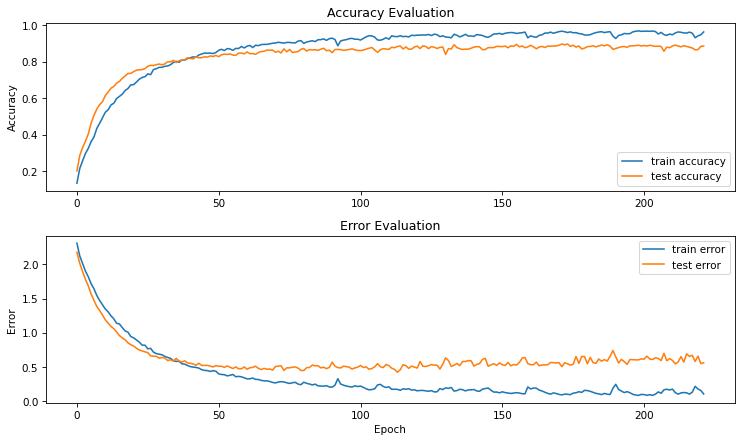


 Plots for Model  2


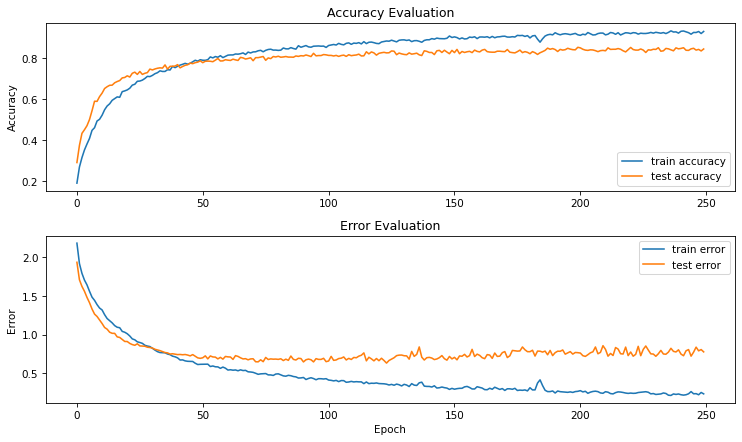


 Plots for Model  3


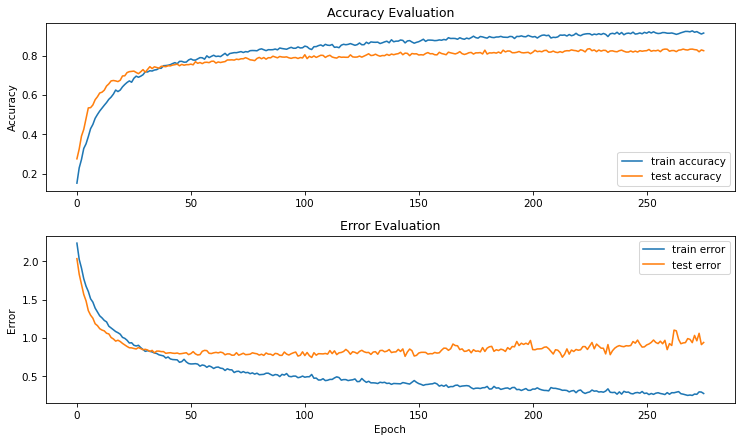


 Plots for Model  4


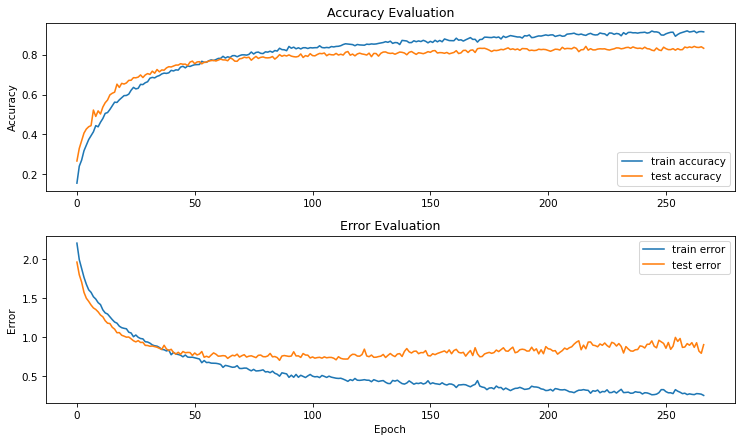


 Plots for Model  5


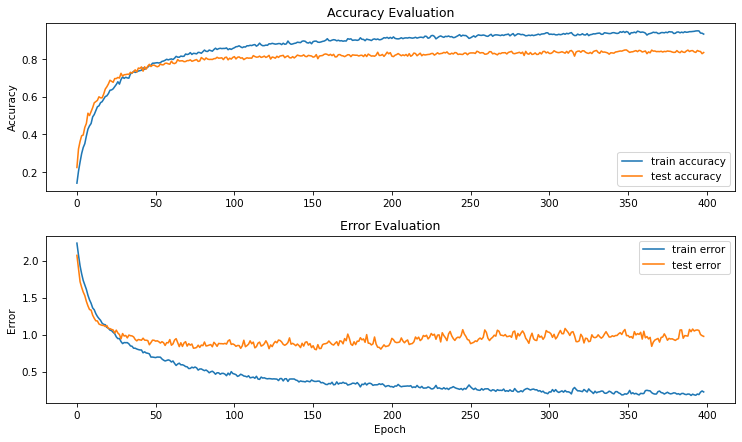


 Plots for Model  6


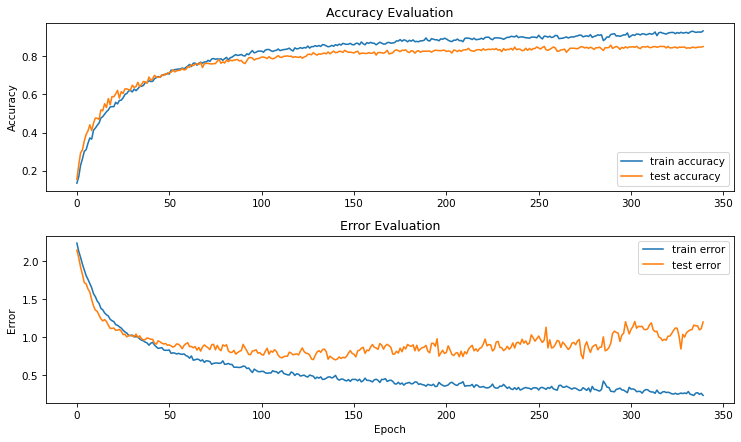

In [10]:
model.plot_all_histories()

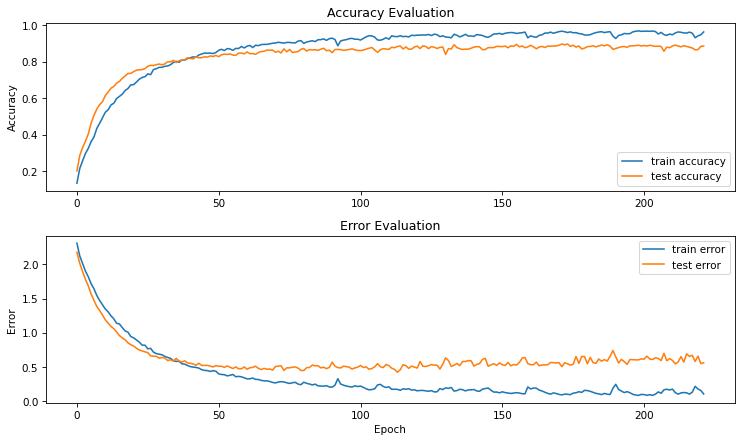

In [11]:
model.plot_history(which_model=1)  # BEST MODEL

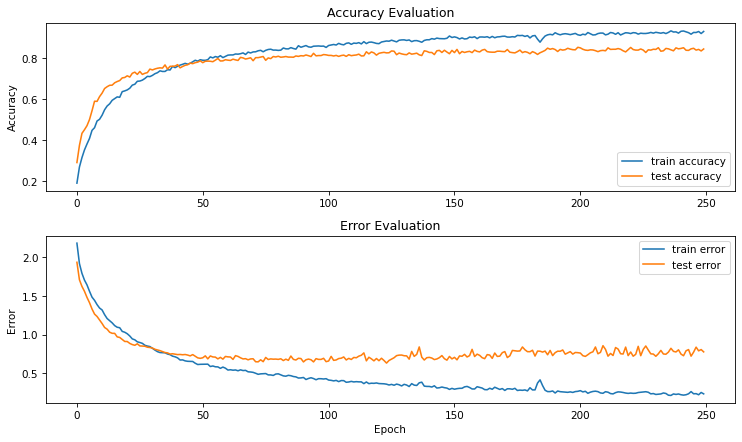

In [12]:
model.plot_history(which_model=2)

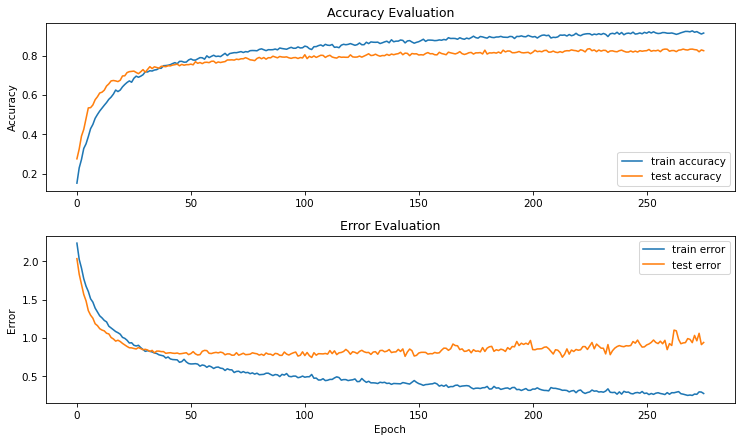

In [13]:
model.plot_history(which_model=3)

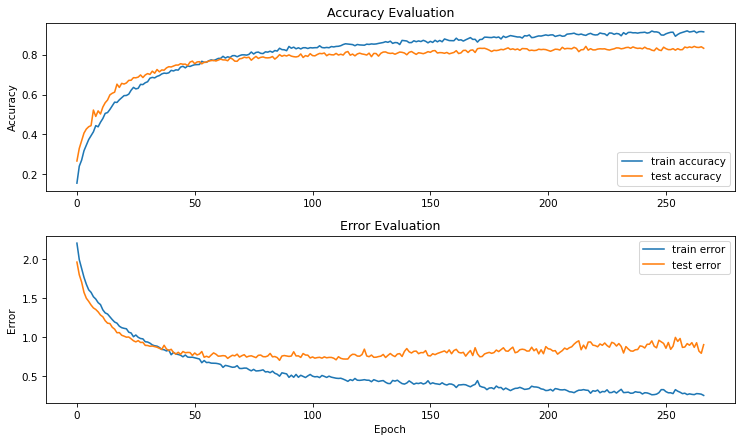

In [14]:
model.plot_history(which_model=4)

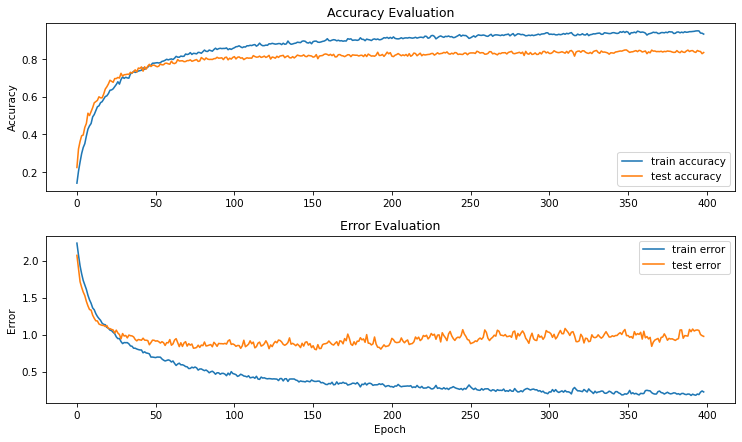

In [15]:
model.plot_history(which_model=5)

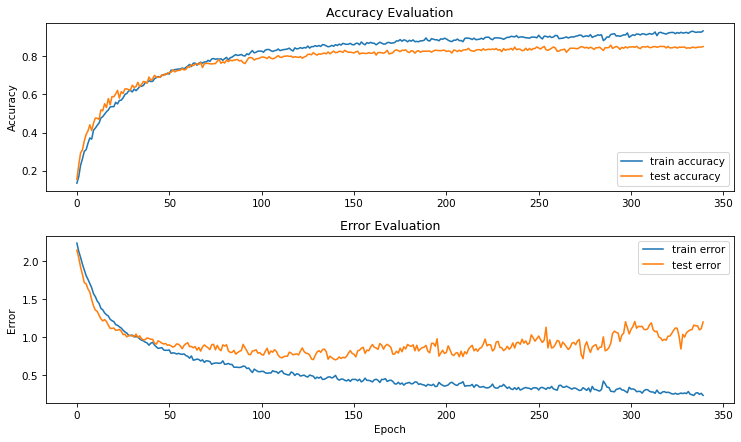

In [16]:
model.plot_history(which_model=6)

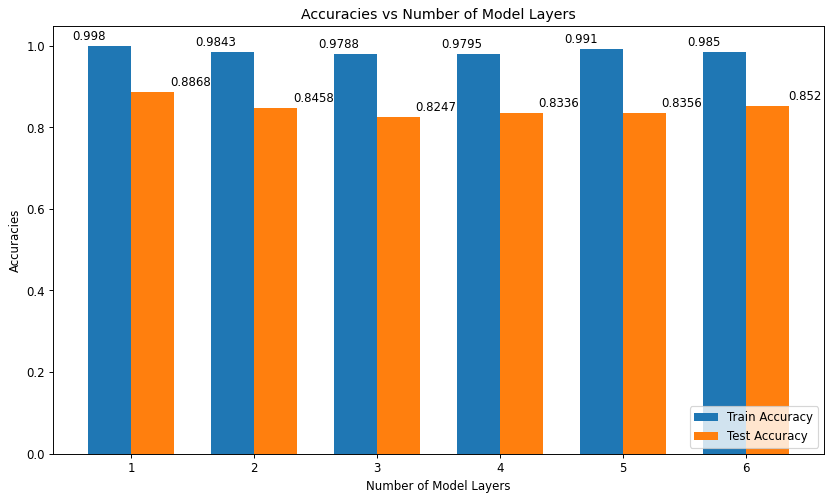

In [17]:
# Plot accuracies vs number of model layers

model.accuracies_vs_models()

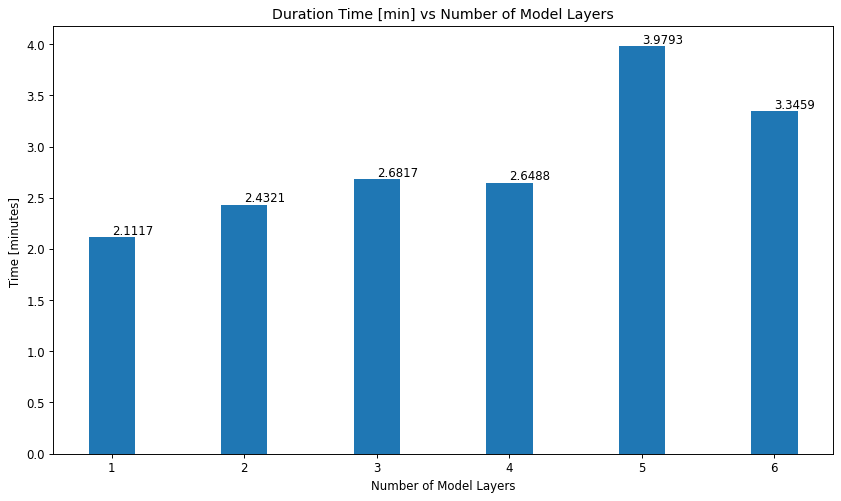

In [18]:
# Plot durations vs number of model layers

model.duration_vs_models()

In [19]:
# Save all generated models

model.save_all_models()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_1/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_2/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_3/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_4/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_5/assets
INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/saved_model_6/assets


In [20]:
# Save the best model. change the argument accordingly

model.save_best_model(best_model=1)

INFO:tensorflow:Assets written to: models/saved_models_DP_0.3/best_model/assets


In [21]:
# from keras.models import load_model

In [22]:
# Load back the best model

best_model = load_model("models/saved_models_DP_0.3/best_model")

In [23]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               86528     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_26 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)                170       
Total params: 88,762
Trainable params: 88,762
Non-trainable params: 0
_________________________________________________________________
